## Pathogenwatch N. Gonno metadata
    - This notebook processes N. Gonno metadata
    - Flags uncurated and repeat isolates
### Takes inputs:
     -  Directory paths
### Output:
    - Concatenated processed Gonno metadata,typing,amr-profile, amr-genes, amr-snps .csv files


### Import modules

In [1]:
import pandas as pd
import os
import glob
import numpy as np
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

### Metadata PATH

In [2]:
# path to the metadata files
collections_path=""

### Subdirectories list

In [3]:
# List of subdirectories
subdirectories = ['0c5bhggpwb3f-thomas-et-al-2019', 'j4mxcy44euca-kwong-et-al-2018',
'0xy89kwboxbr-ryan-et-al-2018', 'nkhbgsps8ws4-osnes-et-al-2020',
'40kdi4tj0mw5-schmerer-et-al-2020', 'qfqviofgd6i8-demczuk-et-al-2016',
'481d4jk73jaz-demczuk-et-al-2015', 'rll02476p0cm-yahara-et-al-2018',
'4hm16wpbztv9-didelot-et-al-2016', 'rvwzxxo2uxw0-lee-et-al-2018',
'600cf60ljmjd-cehovin-et-al-2018', 'sjihkc9vrqkd-lan-et-al-2020',
'6s7iszmj1edv-mortimer-et-al-2020', 'u99d9e02hkns-wind-et-al-2017',
'8o3g3eusd2uw-kwong-et-al-2016', 'ug6zrt1wmzd4-buckley-et-al-2018',
'9stz0m94hin7-sanchez-buso-et-al-2019', 'uzh2c7kc076l-grad-et-al-2016',
'b9xxapwkh5tz-alfsnes-et-al-2020', 'v53qedj4o70c-grad-et-al-2014',
'dz188zpiggd1-ezewudo-et-al-2015', 'vxegrl583s4p-de-silva-et-al-2016',
'eurogasp2013', 'xazjz3gx75on-golparian-et-al-2020',
'eurogasp2018', 'z9p4pvkr6jze-williamson-et-al-2019',
'h3cz3rwyaglw-fifer-et-al-2018', 'zrl97zpngnaj-chisholm-et-al-2016',
'iapx9h18cgyo-grasp-town-et-al-2020']

## Merge the metadata files for all the collections

In [4]:

# Define patterns to match files
file_patterns = [
    '*metadata.csv',
    '*typing.csv',
    '*amr-profile.csv',
    '*amr-genes.csv',
    '*amr-snps.csv']

# Dictionary to store the DataFrames
dataframes = {}

# Process each subdirectory
for subdir in subdirectories:
    subdir_path = os.path.join(collections_path, subdir)
    merged_df = None

    # Find and merge the CSV files matching the patterns
    for pattern in file_patterns:
        files = glob.glob(os.path.join(subdir_path, pattern))
        for file_path in sorted(files):
            df = pd.read_csv(file_path)

            if merged_df is None:
                merged_df = df
            else:
                merged_df = pd.merge(merged_df, df, on='NAME', how='outer')

    # Store the merged DataFrame in the dictionary with a key as the subdirectory name
    dataframes[subdir] = merged_df

# Inspect each dataframe individually to verify the metadata


# EuroGASP 2018

In [5]:
eurogasp2018_df = dataframes['eurogasp2018']

#### Add missing information in project accession, collection label, and literature link columns

In [6]:
eurogasp2018_df['PROJECT ACCESSION'] = 'PRJEB34068'
eurogasp2018_df['COLLECTION LABEL'] = 'EuroGASP2018'
eurogasp2018_df['LITERATURELINK'] = '35659907'


#### Country information for EuroGASP 2018 is missing
#### This information was added from metadata data downloaded from PubMLST

In [7]:
eurogasp2018_df.drop('COUNTRY', axis=1, inplace=True)

In [8]:
## Read eurogasp2018 PubMLST metadata to file
GASP_2018_EURO = pd.read_csv('/Users/lshmg29/Desktop/salmonella_metadata/GASP_2018_EURO.csv', sep=',',
                             names=['isolate', 'COUNTRY'], header=0)
# merge the dataframes
eurogasp2018_df = pd.merge(eurogasp2018_df, GASP_2018_EURO,
        left_on='NAME', right_on='isolate', how='outer')
eurogasp2018_df.drop('isolate', axis=1, inplace=True)


In [9]:
len(eurogasp2018_df)

2375


# Eurogasp2013

In [10]:
eurogasp2013_df = dataframes['eurogasp2013']

#### Add missing information in project accession, collection label, and literature link columns

In [11]:
eurogasp2013_df['PROJECT ACCESSION'] = 'PRJEB9227'
eurogasp2013_df['COLLECTION LABEL'] = 'EuroGASP2013'
eurogasp2013_df['LITERATURELINK'] = '29776807'

#### Sample accession and Country info is missing from the metadata
#### This information was added from metadata data downloaded from PubMLST

In [12]:
# drop columns with NA
eurogasp2013_df.drop('COUNTRY', axis=1, inplace=True)
eurogasp2013_df.drop('SAMPLE ACCESSION', axis=1, inplace=True)

In [13]:
# Read eurogasp2018 PubMLST metadata to file
GASP_2013_EURO = pd.read_csv('/Users/lshmg29/Desktop/salmonella_metadata/GASP_2013_EURO.csv', sep=',',
                            names=['isolate', 'COUNTRY','SAMPLE ACCESSION'])

## merge the dataframe
eurogasp2013_df = pd.merge(eurogasp2013_df, GASP_2013_EURO,
        left_on='NAME', right_on='isolate', how='inner')
eurogasp2013_df.drop('isolate', axis=1, inplace=True)

In [14]:
len(eurogasp2013_df)

1054


# Williamson et al. (2019)

In [15]:
williamson_2019_df = dataframes['z9p4pvkr6jze-williamson-et-al-2019']

In [16]:
len(williamson_2019_df)

2179

# Town et al. (2020)

In [17]:

town_2020_df = dataframes['iapx9h18cgyo-grasp-town-et-al-2020']

In [18]:
len(town_2020_df)

1288

# De Silva et al. (2016)

In [19]:
desilva_2016_df = dataframes['vxegrl583s4p-de-silva-et-al-2016']

In [20]:
len(desilva_2016_df)

1783

# Mortimer et al. (2020)

In [21]:
mortimer_2020_df = dataframes['6s7iszmj1edv-mortimer-et-al-2020']

In [22]:
# add missing columns
mortimer_2020_df['LITERATURELINK'] = '32829411'

In [23]:
len(mortimer_2020_df)

891

# Alfsnes et al. (2020)

In [24]:
alfsnes_2020_df = dataframes['b9xxapwkh5tz-alfsnes-et-al-2020']

In [25]:
len(alfsnes_2020_df)

816

# Osnes et al. (2020)

In [26]:
osnes_2020_df = dataframes['nkhbgsps8ws4-osnes-et-al-2020']

In [27]:
len(osnes_2020_df)

133

#### add missing LITERATURELINK 

In [28]:
osnes_2020_df['LITERATURELINK'] = '33200978'

# Schmerer et al. (2020)

In [29]:
schmerer_2020_df = dataframes['40kdi4tj0mw5-schmerer-et-al-2020']

In [30]:
len(schmerer_2020_df)

324

# Cehovin et al. (2018)

In [31]:
cehovin_2018_df = dataframes['600cf60ljmjd-cehovin-et-al-2018']

In [32]:
len(cehovin_2018_df)

112

# Grad et al. (2016)

In [33]:
grad_2016_df = dataframes['uzh2c7kc076l-grad-et-al-2016']

In [34]:
len(grad_2016_df)

1035

# Grad et al. (2014)

In [35]:
grad_2014_df = dataframes['v53qedj4o70c-grad-et-al-2014']

In [36]:
len(grad_2014_df)

216

# Ezewudo et al. (2015)

In [37]:
ezewudo_2015_df = dataframes['dz188zpiggd1-ezewudo-et-al-2015']

In [38]:
len(ezewudo_2015_df)

18

# Wind et al. (2017)

In [39]:
wind_2017_df = dataframes['u99d9e02hkns-wind-et-al-2017']

In [40]:
len(wind_2017_df)

23

# Thomas et al. (2019)

In [41]:
thomas_2019_df = dataframes['0c5bhggpwb3f-thomas-et-al-2019']

In [42]:
len(thomas_2019_df)

644

# Lan et al. (2020)

In [43]:
lan_2020_df = dataframes['sjihkc9vrqkd-lan-et-al-2020']

# Golparian et al. (2020)

In [44]:
golparian_2020_df = dataframes['xazjz3gx75on-golparian-et-al-2020']

In [45]:
len(golparian_2020_df)

192

# Chisholm et al. (2016)

In [46]:
chisholm_2016_df = dataframes['zrl97zpngnaj-chisholm-et-al-2016']

In [47]:
len(chisholm_2016_df)

14

# Ryan et al. (2018)

In [48]:
ryan_2018_df = dataframes['0xy89kwboxbr-ryan-et-al-2018']

In [49]:
len(ryan_2018_df)

42

# Kwong et al. (2016)

In [50]:
kwong_2016_df = dataframes['8o3g3eusd2uw-kwong-et-al-2016']

In [51]:
len(kwong_2016_df)

48

# Kwong et al. (2018)

In [52]:
kwong_2018_df = dataframes['j4mxcy44euca-kwong-et-al-2018']

In [53]:
len(kwong_2018_df)

75

# Buckley et al. (2018)

In [54]:
buckley_2018_df = dataframes['ug6zrt1wmzd4-buckley-et-al-2018']

In [55]:
len(buckley_2018_df)

92

# Fifer et al. (2018)

In [56]:
fifer_2018_df = dataframes['h3cz3rwyaglw-fifer-et-al-2018']

In [57]:
len(fifer_2018_df)

100

# Didelot et al. (2016)

In [58]:
didelot_2016_df = dataframes['4hm16wpbztv9-didelot-et-al-2016']

#### The metadata has duplicates 

In [59]:
## drop duplicates 
didelot_2016_df= didelot_2016_df.drop_duplicates(['NAME','EXPERIMENT ACCESSION','RUN ACCESSION'])


#### Experiment and run accessions are inconsistent with the publication
#### The metadata is annotated with uncurated_discr (uncurated_discrepancy)

In [60]:
didelot_2016_df['CURATION'] = 'uncurated_discr'

## fill na in the CURATION column with curated 
didelot_2016_df['CURATION'].fillna('Curated', inplace=True)

In [61]:
len(didelot_2016_df)

194

# Demczuk et al. (2016)

In [62]:
demczuk_2016_df = dataframes['qfqviofgd6i8-demczuk-et-al-2016']

In [63]:
len(demczuk_2016_df)

200

# Demczuk et al. (2015)

In [64]:
demczuk_2015_df = dataframes['481d4jk73jaz-demczuk-et-al-2015']

In [65]:
len(demczuk_2015_df)

168

# Sánchez-Busó et al. (2019)

In [66]:
sanchez_buso_2019_df = dataframes['9stz0m94hin7-sanchez-buso-et-al-2019']

In [67]:
len(sanchez_buso_2019_df)

395

# Yahara et al. (2018)

In [68]:
yahara_2018_df = dataframes['rll02476p0cm-yahara-et-al-2018']

# Lee et al. (2018)

In [69]:
lee_2018_df = dataframes['rvwzxxo2uxw0-lee-et-al-2018']

In [70]:
len(lee_2018_df)

376

# Check for duplicated isolates based on the NAME column

### Compare and print duplicates

In [71]:
#create a dicitonary of the dataframes

dfs = {
    'lee_2018': lee_2018_df, 
    'yahara_2018': yahara_2018_df, 
    'sanchez_buso_2019': sanchez_buso_2019_df, 
    'demczuk_2015': demczuk_2015_df,
    'demczuk_2016': demczuk_2016_df,
    'didelot_2016': didelot_2016_df,
    'fifer_2018': fifer_2018_df,
    'buckley_2018': buckley_2018_df,
    'kwong_2018': kwong_2018_df,
    'kwong_2016': kwong_2016_df,
    'ryan_2018': ryan_2018_df,
    'chisholm_2016': chisholm_2016_df,
    'golparian_2020': golparian_2020_df,
    'lan_2020': lan_2020_df,
    'thomas_2019': thomas_2019_df,
    'wind_2017': wind_2017_df,
    'ezewudo_2015': ezewudo_2015_df,
    'grad_2014': grad_2014_df,
    'grad_2016': grad_2016_df,
    'cehovin_2018': cehovin_2018_df,
    'schmerer_2020': schmerer_2020_df,
    'osnes_2020': osnes_2020_df,
    'alfsnes_2020': alfsnes_2020_df,
    'mortimer_2020': mortimer_2020_df,
    'desilva_2016': desilva_2016_df,
    'town_2020': town_2020_df,
    'williamson_2019': williamson_2019_df,
    'eurogasp2013': eurogasp2013_df,
    'eurogasp2018': eurogasp2018_df
}

In [72]:
# compare and print duplicates
def compare_and_print_duplicates(dfs):
    keys = list(dfs.keys())
    for i in range(len(keys)):
        for j in range(i+1, len(keys)):
            key1, key2 = keys[i], keys[j]
            df1, df2 = dfs[key1], dfs[key2]
            
            # Find duplicates in 'NAME' column
            duplicated = pd.merge(df1[['NAME']], df2[['NAME']], on='NAME', how='inner')
            
            # Check if there are any duplicates and print them
            if not duplicated.empty:
                dup_list = duplicated['NAME'].tolist()
                print(f"Duplicates between {key1} and {key2}:")
                print(duplicated['NAME'].tolist())

In [73]:
#compare_and_print_duplicates(dfs)

## Flag duplicate/repeat isolates in the dataframe

In [74]:
def compare_mark_duplicates_and_concatenate(dfs):
    keys = list(dfs.keys())
    for i in range(len(keys)):
        for j in range(i+1, len(keys)):
            key1, key2 = keys[i], keys[j]
            df1, df2 = dfs[key1], dfs[key2]

            # Find duplicates in 'NAME' column
            duplicated = pd.merge(df1[['NAME']], df2[['NAME']], on='NAME', how='inner')
            
            # Mark duplicates in the original dataframes
            if not duplicated.empty:
                duplicate_flag = f'Dupl_{key1}-{key2}'
                for name in duplicated['NAME']:
                    # Update 'repeat_isolates' in both dataframes
                    df1.loc[df1['NAME'] == name, 'REPEAT_ISOLATES'] = duplicate_flag
                    df2.loc[df2['NAME'] == name, 'REPEAT_ISOLATES'] = duplicate_flag

    # Concatenate all dataframes into one
    pw_concatenated_df = pd.concat(dfs.values(), ignore_index=True)

    return pw_concatenated_df

In [75]:
# concatenate all Gonno data
pw_concatenated_metadata_df = compare_mark_duplicates_and_concatenate(dfs)

In [76]:
# modify names REPEAT_ISOLATES rows
pw_concatenated_metadata_df['REPEAT_ISOLATES'] = pw_concatenated_metadata_df['REPEAT_ISOLATES'].str.replace(r'_(\d{4})', r'\1', regex=True)

# Replacing NaN in the REPEAT_ISOLATES column with unique
pw_concatenated_metadata_df['REPEAT_ISOLATES'].replace(np.nan, 'Unique', inplace=True)

### Reshuffle columns and drop the unwanted columns

In [77]:
columns = list(pw_concatenated_metadata_df.columns)
columns_to_move = ['COLLECTION LABEL', 'CURATION', 'REPEAT_ISOLATES']

# Remove these columns from the original list
for column in columns_to_move:
    columns.remove(column)

# Append them back at the end
columns.extend(columns_to_move)

# Reorder the DataFrame
pw_concatenated_metadata_df = pw_concatenated_metadata_df[columns]


## drop columns
pw_concatenated_metadata_df.drop(['REPORTING COUNTRY', 'PMID 2', 'BIORXIV', 'COLLECTION'], axis=1, inplace=True)

In [78]:
## fill na in the CURATION column with curated 
pw_concatenated_metadata_df['CURATION'].fillna('Curated', inplace=True)

In [79]:
len(pw_concatenated_metadata_df)

15259

In [80]:
### Further pre-processing of the metadata

In [81]:
# rename country column
pw_concatenated_metadata_df.rename(columns={'COUNTRY': 'COUNTRY_ONLY'}, inplace=True)

### Add date information in the EuroGASP2018 isolates

In [82]:
for index, row in pw_concatenated_metadata_df.iterrows():
    # Check if 'DATE' is NaN and 'COLLECTION LABEL' is 'EuroGASP2018'
    if pd.isna(row['DATE']) and row['COLLECTION LABEL'] == 'EuroGASP2018':
        # Extract year from 'COLLECTION LABEL' and add it to NaN values
        year = row['COLLECTION LABEL'][-4:]
        pw_concatenated_metadata_df.at[index, 'DATE'] = year

## Create a dashboard view column
## Write a condition to exclude rows with no country, Date, repeat_isolates, uncurated info

In [83]:
pw_concatenated_metadata_df['dashboard view'] = np.where(
    (pw_concatenated_metadata_df['COUNTRY_ONLY'].notna()) & 
    (pw_concatenated_metadata_df['DATE'].notna()) & 
    (~pw_concatenated_metadata_df['REPEAT_ISOLATES'].str.startswith('Dupl')) & 
    (pw_concatenated_metadata_df['CURATION'] != 'uncurated_discr') &
    (~pw_concatenated_metadata_df['DATE'].isna()) &
    (~pw_concatenated_metadata_df['COUNTRY_ONLY'].isna()),
    'Include',  
    'Exclude'  # other cases
)

## Format DATE information

In [84]:
# convert the column to a string
pw_concatenated_metadata_df['DATE'] = pw_concatenated_metadata_df['DATE'].astype(str)

In [85]:
# modify the date string
pw_concatenated_metadata_df['DATE'] = pw_concatenated_metadata_df['DATE'].str.extract(r'\b(\d{4})\b')

In [87]:
# write the metadata file to csv
pw_concatenated_metadata_df.to_csv('PW_Gonno_collections_metadata.csv', sep=',', index=False)

## Create typing, amr_profile, amr_genes and amr_snps individual files

In [88]:
# Patterns to match files
genotype_files = [
    '*typing.csv',
    '*amr-profile.csv',
    '*amr-genes.csv',
    '*amr-snps.csv'
]


In [89]:
# Merged dataframes
merged_genotype_dfs = {}

# Loop through subdirectories
for subdir in subdirectories:
    subdir_path = os.path.join(collections_path, subdir)
    
    # Initialize empty dataframes for each pattern
    genotype_dfs = {pattern: pd.DataFrame() for pattern in genotype_files}
    
    # Loop through files in subdirectory
    for pattern in genotype_files:
        # Get files matching pattern
        files = glob.glob(os.path.join(subdir_path, pattern))
        
        # Read and concatenate files into dataframe
        if files:
            genotype_dfs[pattern] = pd.concat((pd.read_csv(file) for file in files), ignore_index=True)

    # Extract collection_label from subdir name
    Collection_label = subdir.split('-', 1)[1] if '-' in subdir else subdir
    
    # Add collection_label column to each dataframe in dfs
    for pattern, df in genotype_dfs.items():
        df['Collection_label'] = Collection_label
    
    # Store merged dataframes for this subdirectory
    merged_genotype_dfs[subdir] = genotype_dfs


## Typing dfs

In [90]:
# List to store typing DataFrames for all subdirectories
all_typing_dfs = []

# Iterate over subdirectories
for subdir, dfs in merged_genotype_dfs.items():
    # Access the typing DataFrame for the current subdirectory
    typing_df = dfs['*typing.csv']
    
    # Append the typing DataFrame to the list
    all_typing_dfs.append(typing_df)

# Concatenate all typing DataFrames into one DataFrame
typing_df_all_subdirs = pd.concat(all_typing_dfs, ignore_index=True)

In [91]:
typing_df_all_subdirs.to_csv('pw_Gonno_typing.csv', sep=',', index=False)

In [92]:
#typing_df_all_subdirs[typing_df_all_subdirs['NAME'].duplicated(keep=False)]

### Amr profile data

In [93]:
# List to store typing DataFrames for all subdirectories
amr_profile_dfs = []

# Iterate over subdirectories
for subdir, dfs in merged_genotype_dfs.items():
    # Access the typing DataFrame for the current subdirectory
    amr_prof_df = dfs['*amr-profile.csv']
    
    # Append the typing DataFrame to the list
    amr_profile_dfs.append(amr_prof_df)

# Concatenate all typing DataFrames into one DataFrame
amr_profile_dfs_all_subdirs = pd.concat(amr_profile_dfs, ignore_index=True)

In [94]:
amr_profile_dfs_all_subdirs.to_csv('pw_Gonno_amr_profile.csv', sep=',', index=False)

In [95]:
#amr_profile_dfs_all_subdirs[amr_profile_dfs_all_subdirs['NAME'].duplicated(keep=False)]

### AMR_GENES

In [96]:
# List to store typing DataFrames for all subdirectories
amr_genes_dfs = []

# Iterate over subdirectories
for subdir, dfs in merged_genotype_dfs.items():
    # Access the typing DataFrame for the current subdirectory
    amr_gene_df = dfs['*amr-genes.csv']
    
    # Append the typing DataFrame to the list
    amr_genes_dfs.append(amr_gene_df)

# Concatenate all typing DataFrames into one DataFrame
amr_genes_dfs_all_subdirs = pd.concat(amr_genes_dfs, ignore_index=True)

In [97]:
amr_genes_dfs_all_subdirs = amr_genes_dfs_all_subdirs.fillna(0)

In [98]:
# List of columns to convert from float to integer
float_columns = [col for col in amr_genes_dfs_all_subdirs.columns if amr_genes_dfs_all_subdirs[col].dtype == 'float']

# Convert float columns to integer
amr_genes_dfs_all_subdirs[float_columns] = amr_genes_dfs_all_subdirs[float_columns].astype(int)


In [99]:
#amr_genes_dfs_all_subdirs[amr_genes_dfs_all_subdirs['NAME'].duplicated(keep=False)]

In [100]:
amr_genes_dfs_all_subdirs.to_csv('pw_Gonno_amr_genes.csv', sep=',', index=False)

## AMR SNPs

In [101]:
# List to store typing DataFrames for all subdirectories
amr_snps_dfs = []

# Iterate over subdirectories
for subdir, dfs in merged_genotype_dfs.items():
    # Access the typing DataFrame for the current subdirectory
    amr_snp_df = dfs['*amr-snps.csv']
    
    # Append the typing DataFrame to the list
    amr_snps_dfs.append(amr_snp_df)

# Concatenate all typing DataFrames into one DataFrame
amr_snps_dfs_all_subdirs = pd.concat(amr_snps_dfs, ignore_index=True)

In [102]:
# Extract column names
columns_order = list(amr_snps_dfs_all_subdirs.columns)

# Move 'collection_label' to the end
if 'Collection_label' in columns_order:
    columns_order.remove('Collection_label')
    columns_order.append('Collection_label')

# Reorder columns
amr_snps_dfs_all_subdirs = amr_snps_dfs_all_subdirs.reindex(columns=columns_order)

In [103]:
amr_snps_dfs_all_subdirs = amr_snps_dfs_all_subdirs.fillna(0)
# List of columns to convert from float to integer
float_columns = [col for col in amr_snps_dfs_all_subdirs.columns if amr_snps_dfs_all_subdirs[col].dtype == 'float']

# Convert float columns to integer
amr_snps_dfs_all_subdirs[float_columns] = amr_snps_dfs_all_subdirs[float_columns].astype(int)


In [111]:
#amr_snps_dfs_all_subdirs[amr_snps_dfs_all_subdirs['NAME'].duplicated(keep=False)]

In [105]:
amr_snps_dfs_all_subdirs.to_csv('pw_Gonno_amr_snps.csv', sep=',', index=False)

### Visualization
### NG-MAST sequence types

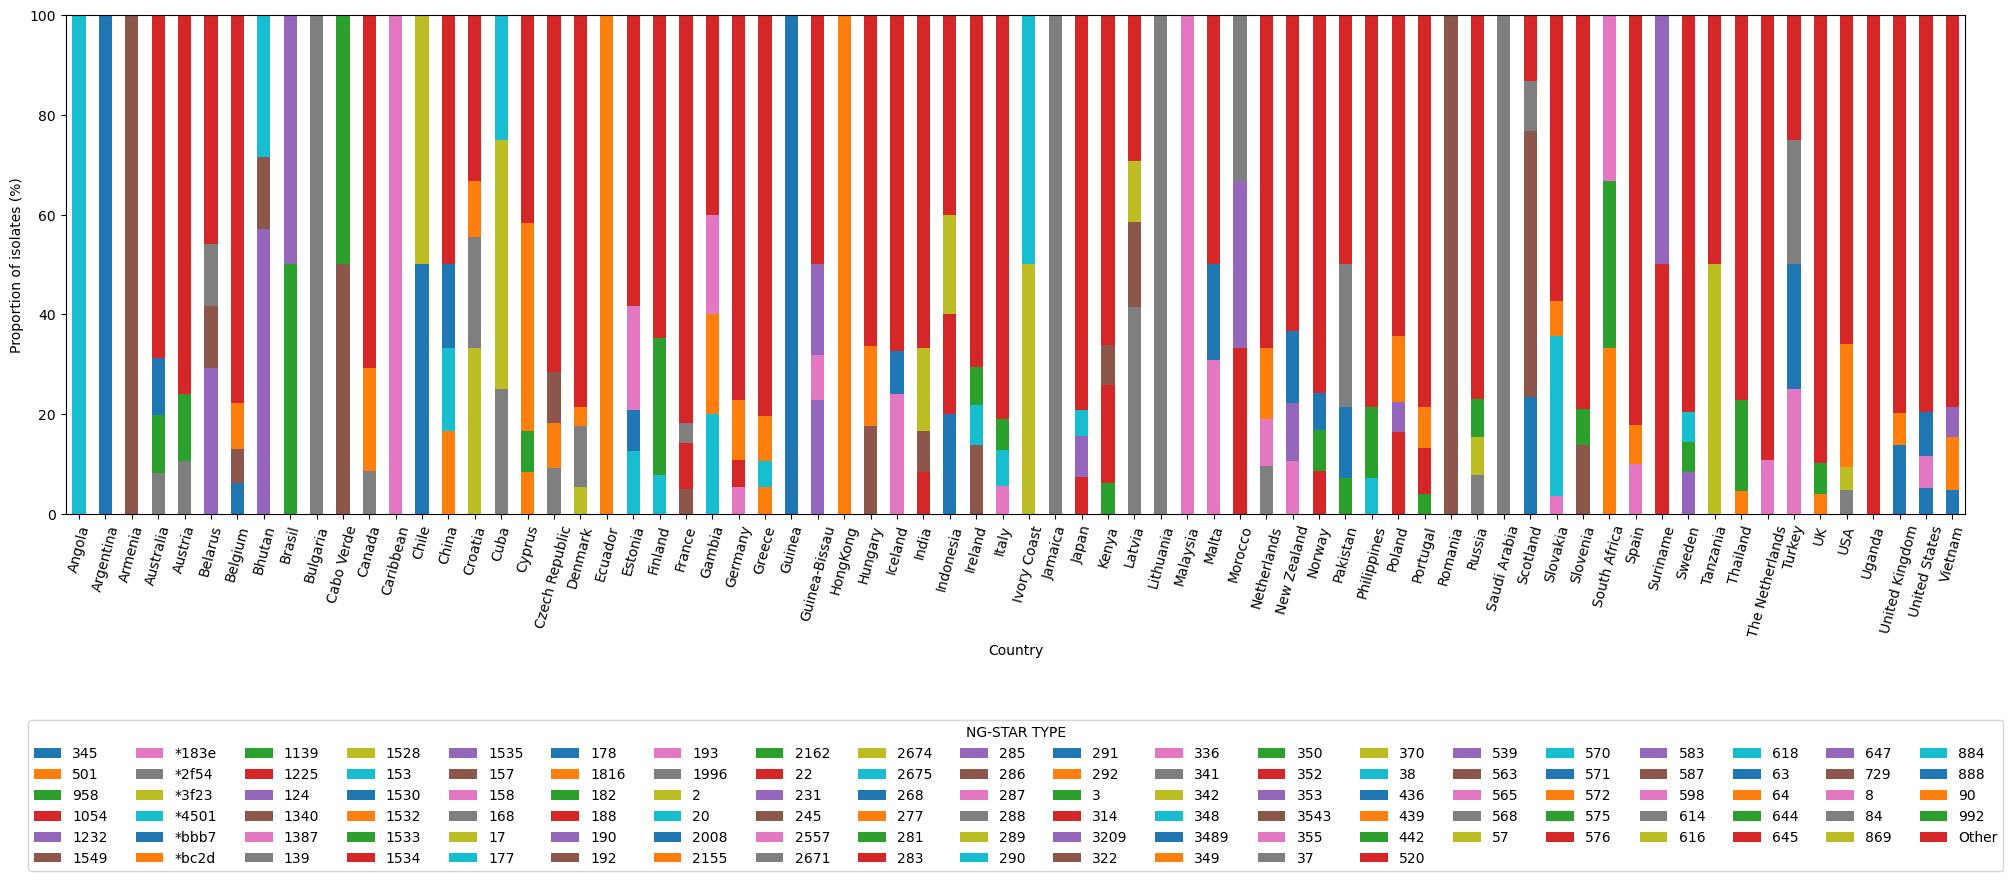

In [107]:
# Calculate proportion of top 3 NG-STAR sequence TYPE
top3 = pw_concatenated_metadata_df.groupby(['COUNTRY_ONLY', 'NG-STAR TYPE']).size().groupby(level=0).nlargest(3).reset_index(level=0, drop=True).reset_index(name='count')

# Calculate total counts per country
total_counts = pw_concatenated_metadata_df.groupby('COUNTRY_ONLY').size().reset_index(name='total_count')

# Merge dataframes to get proportions
merged_df = pd.merge(top3, total_counts, on='COUNTRY_ONLY')

merged_df['proportion'] = (merged_df['count'] / merged_df['total_count']) * 100

# Pivot table to get data in desired format for plotting
pivot_df = merged_df.pivot(index='COUNTRY_ONLY', columns='NG-STAR TYPE', values='proportion').fillna(0)
pivot_df['Other'] = 100 - pivot_df.sum(axis=1)

# Plot stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(22, 10))
plt.xlabel('Country')
plt.ylabel('Proportion of isolates (%)')
plt.xticks(rotation=75)

# Place legends horizontally at the bottom with 3 legends in a column
plt.legend(title='NG-STAR TYPE', bbox_to_anchor=(0.5, -0.4), loc='upper center', ncol=20)
plt.tight_layout()
plt.show()


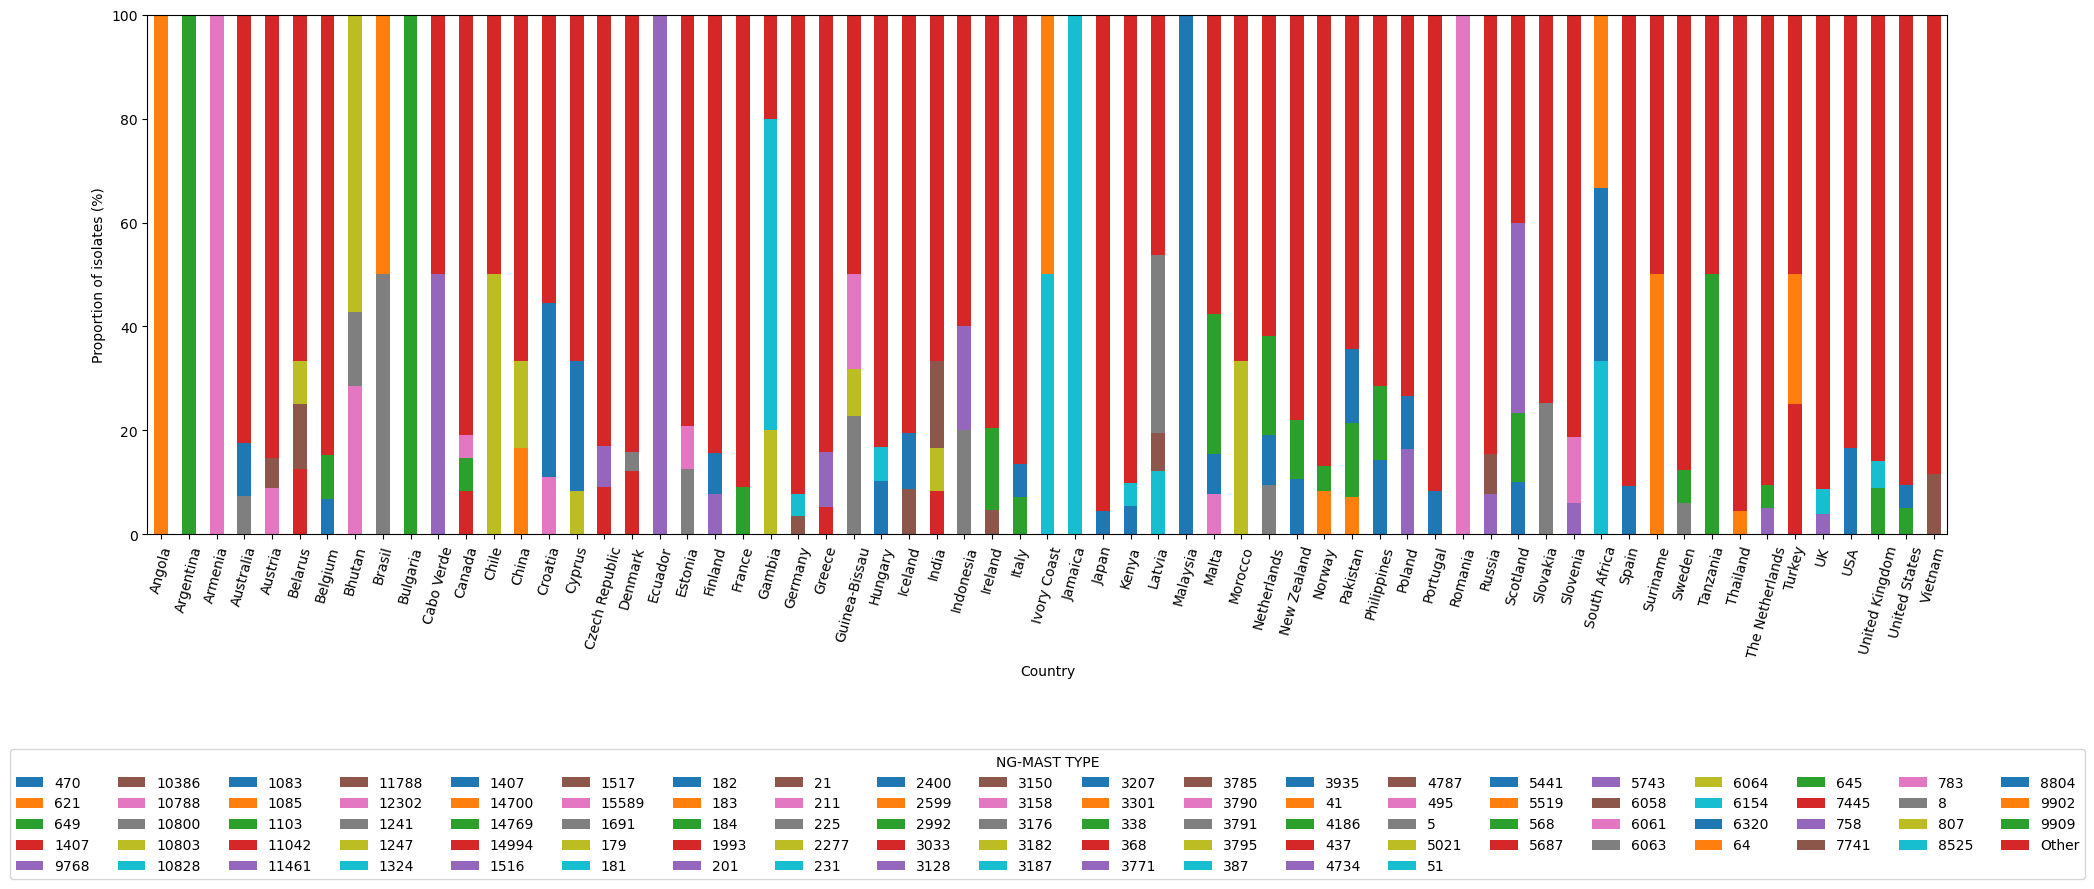

In [110]:
# Calculate proportion of top 3 NG-MAST TYPE
top3_MAST = pw_concatenated_metadata_df.groupby(['COUNTRY_ONLY', 'NG-MAST TYPE']).size().groupby(level=0).nlargest(3).reset_index(level=0, drop=True).reset_index(name='count')

# Calculate total counts per country
total_counts_mast = pw_concatenated_metadata_df.groupby('COUNTRY_ONLY').size().reset_index(name='total_count')

# Merge dataframes to get proportions
merged_df_mast = pd.merge(top3_MAST, total_counts_mast, on='COUNTRY_ONLY')
merged_df_mast = merged_df_mast[merged_df_mast['NG-MAST TYPE'] != '-']

merged_df_mast['proportion'] = (merged_df_mast['count'] / merged_df_mast['total_count']) * 100

# Pivot table to get data in desired format for plotting
pivot_df_mast = merged_df_mast.pivot(index='COUNTRY_ONLY', columns='NG-MAST TYPE', values='proportion').fillna(0)
pivot_df_mast['Other'] = 100 - pivot_df_mast.sum(axis=1)

# Plot stacked bar chart
pivot_df_mast.plot(kind='bar', stacked=True, figsize=(22, 10))
plt.xlabel('Country')
plt.ylabel('Proportion of isolates (%)')
plt.xticks(rotation=75)

# Place legends horizontally at the bottom with 3 legends in a column
plt.legend(title='NG-MAST TYPE', bbox_to_anchor=(0.5, -0.4), loc='upper center', ncol=20)
plt.tight_layout()
plt.show()
